In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [3]:
train.shape

(245725, 11)

In [4]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
train.describe(include = 'all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,KV3ZPFSW,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [7]:
test.shape

(105312, 10)

In [8]:
test.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [10]:
test.describe(include = 'all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
count,105312,105312,105312.000000,105312,105312,105312,105312.000000,92790,1.053120e+05,105312
unique,105312,2,NaN,35,4,4,NaN,2,NaN,2
top,KUGDIDYB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No
freq,1,57705,NaN,15125,43192,44484,NaN,61608,NaN,63797
mean,NaN,NaN,43.871002,NaN,NaN,NaN,46.842819,NaN,1.134195e+06,NaN
std,NaN,NaN,14.872890,NaN,NaN,NaN,32.273634,NaN,8.662430e+05,NaN
min,NaN,NaN,24.000000,NaN,NaN,NaN,7.000000,NaN,2.259700e+04,NaN
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.039822e+05,NaN
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.966345e+05,NaN
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.371598e+06,NaN


In [11]:
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [12]:
test.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [13]:
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [14]:
train['Credit_Product'] = train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product'] = test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [15]:
train.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [17]:
train.describe(include = 'all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,245725,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,KV3ZPFSW,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,173682,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


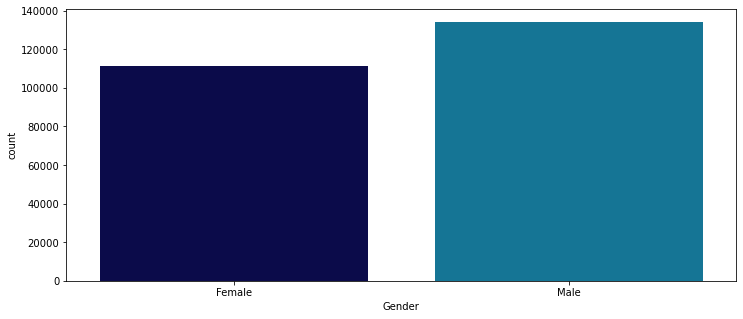

In [18]:
plt.figure(figsize=(12,5))
sns.countplot('Gender',data = train, palette='ocean')

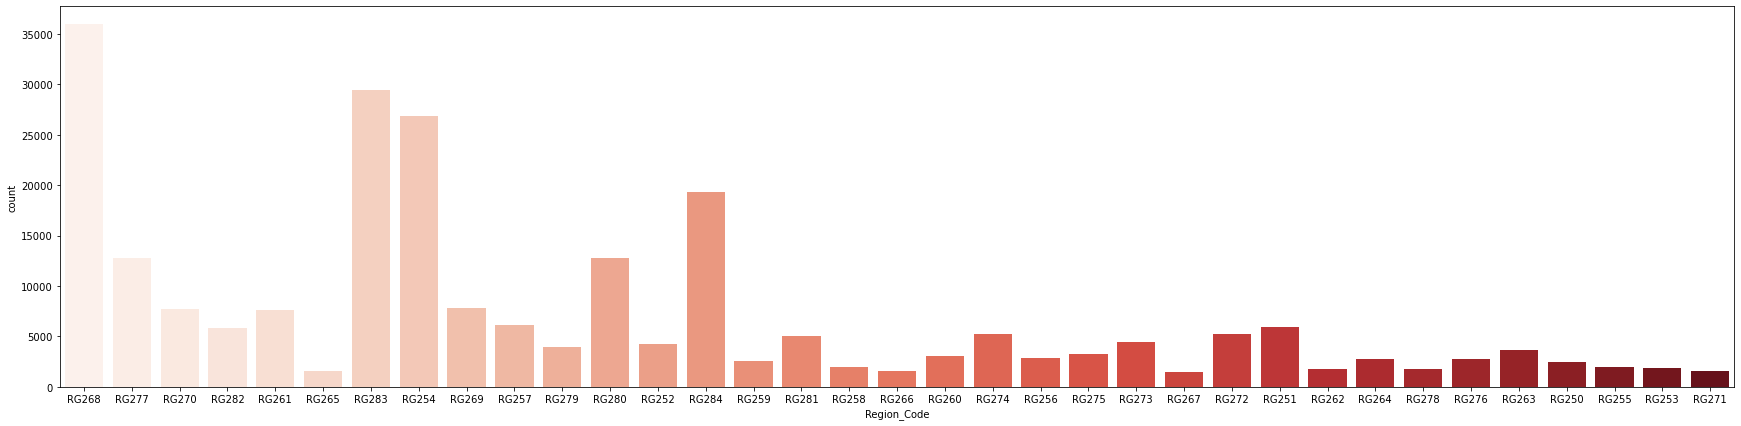

In [19]:
plt.figure(figsize=(30,7))
sns.countplot('Region_Code',data = train, palette='Reds')

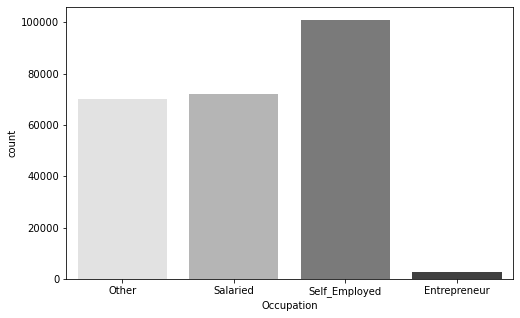

In [20]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data = train, palette= 'Greys')

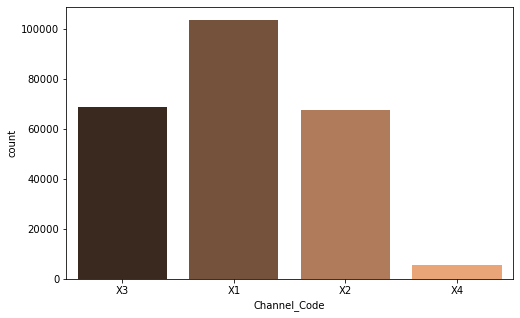

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data = train, palette= 'copper')

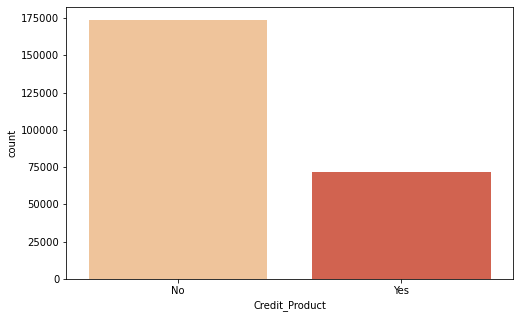

In [22]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data = train, palette= 'OrRd')

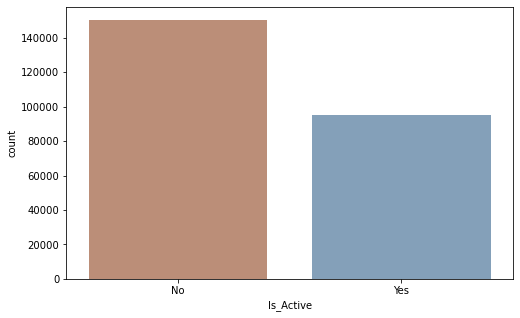

In [23]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data = train, palette= 'twilight_shifted_r')

In [24]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

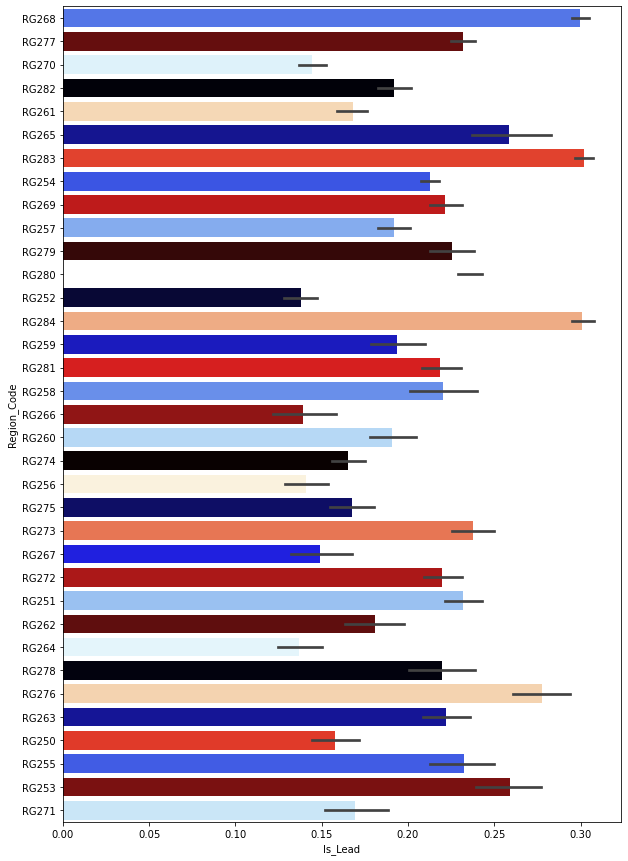

In [25]:
plt.figure(figsize=(10,15))
sns.barplot(y='Region_Code', x='Is_Lead', data=train, palette='flag')

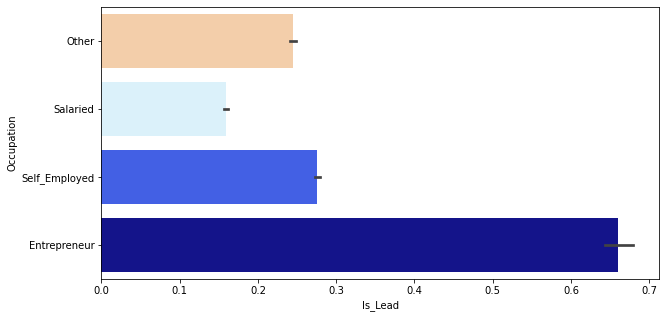

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(y='Occupation', x='Is_Lead', data=train, palette='flag')

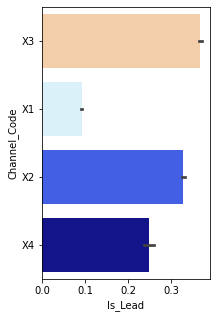

In [27]:
plt.figure(figsize=(3,5))
sns.barplot(y='Channel_Code', x='Is_Lead', data=train, palette='flag')

In [28]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [29]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [30]:
train['Id'] = label.fit_transform(train['ID'])
cols = ['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in cols:
    train[i] = label.fit_transform(train[i])

In [31]:
test['Id'] = label.fit_transform(test['ID'])
for i in cols:
    test[i] = label.fit_transform(test[i])

In [32]:
Train = pd.get_dummies(train, columns = cols)
Test = pd.get_dummies(test, columns = cols)

In [57]:
Train.shape

(245725, 55)

In [33]:
final_train = Train.select_dtypes(exclude = object)
final_test = Test.select_dtypes(exclude = object)

In [34]:
final_train.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Id,Gender_0,Gender_1,Region_Code_0,Region_Code_1,Region_Code_2,...,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Is_Active_0,Is_Active_1
0,73,43,1045696,0,179194,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,30,32,581988,0,131013,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,56,26,1484315,0,121520,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,34,19,470454,0,57273,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,30,33,886787,0,209602,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [35]:
final_test.head()

,Age,Vintage,Avg_Account_Balance,Id,Gender_0,Gender_1,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,...,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Is_Active_0,Is_Active_1
0,29,25,742366,94233,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,43,49,925537,28747,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,31,14,215949,94883,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,29,33,868070,90941,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,29,19,657087,87803,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [36]:
X = final_train.drop(['Is_Lead'], axis = 1)
y = final_train[['Is_Lead']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)

In [38]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor



lin = LinearRegression()
log = LogisticRegression()
Rd = Ridge()
Ls = Lasso()
KNN = KNeighborsRegressor()
NB = GaussianNB() 
SVM = SVR()
DT = DecisionTreeRegressor(criterion='mse', splitter='best', 
                           max_depth=5000, min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features=None, 
                           random_state=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0, min_impurity_split=None, 
                           ccp_alpha=0)
RF = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                             random_state=None, verbose=0, warm_start=False, 
                             ccp_alpha=0.0, max_samples=None)

BR = BaggingRegressor(base_estimator = DT)
GBR = GradientBoostingRegressor()

In [39]:
algo = [lin, Ls, KNN, DT, RF, BR, GBR]
Algo_names = ['LinearRegression', 
              'Lasso','KNeighborsRegressor',
              'DecisionTreeRegressor','RandomForestRegressor','BaggingRegressor','GradientBoostingRegressor']
rmse_list = []

In [40]:
for name in algo:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [41]:
evaluation = pd.DataFrame({'Model': Algo_names, 'RMSE': rmse_list})
evaluation.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE
6,GradientBoostingRegressor,0.380862
4,RandomForestRegressor,0.387001
0,LinearRegression,0.399789
5,BaggingRegressor,0.404444
1,Lasso,0.411309
2,KNeighborsRegressor,0.464281
3,DecisionTreeRegressor,0.535294


In [42]:
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse1 = np.sqrt(MSE)
#rmse_list.append(rmse)

In [43]:
Rd.fit(X_train, y_train)
y_pred = Rd.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse2 = np.sqrt(MSE)
#rmse_list.append(rmse)

In [44]:
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse4 = np.sqrt(MSE)
#rmse_list.append(rmse)

In [45]:
algo_names = ['LogisticRegression','Ridge', 'Navie-Bayes']
rmse_list2 = [rmse1,rmse2,rmse4]

evaluation2 = pd.DataFrame({'Model': algo_names, 'RMSE' : rmse_list2})

In [46]:
Evaluation = pd.concat([evaluation, evaluation2], axis = 0, ignore_index = True)
Evaluation.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE
6,GradientBoostingRegressor,0.380862
4,RandomForestRegressor,0.387001
0,LinearRegression,0.399789
8,Ridge,0.399789
5,BaggingRegressor,0.404444
1,Lasso,0.411309
2,KNeighborsRegressor,0.464281
9,Navie-Bayes,0.495929
7,LogisticRegression,0.502309
3,DecisionTreeRegressor,0.535294


In [47]:
#from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier





#lin = LinearRegression()
#log = LogisticRegression()
#Rd = Ridge()
#Ls = Lasso()
KNNC = KNeighborsClassifier()
NBC = GaussianNB() 
SVMC = SVC()
DTC = DecisionTreeClassifier(criterion='gini', splitter='random', 
                           max_depth=5000, min_samples_split=25, min_samples_leaf=15, 
                           min_weight_fraction_leaf=0.0, max_features=None, 
                           random_state=645, max_leaf_nodes=None, 
                           min_impurity_decrease=0, min_impurity_split=None, 
                           ccp_alpha=0)
RFC = RandomForestClassifier(n_estimators=5000, criterion='gini', max_depth=None, 
                             min_samples_split=25, min_samples_leaf=15, min_weight_fraction_leaf=0.0, 
                             max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                             random_state=645, verbose=0, warm_start=False, 
                             ccp_alpha=0.0, max_samples=None)

BC = BaggingClassifier(base_estimator = DT, n_estimators = 80)
GBRC = GradientBoostingClassifier()
xbgc = XGBClassifier()
SGDC = SGDClassifier()
ADC = AdaBoostClassifier()

VotingClassifierModel = VotingClassifier(estimators=[('Logistic model',log),('Naive Bayes Regressor',NB),
                                                     ('KNN',KNNC),('Support Vector Machines',SVMC),('Naive Bayes Classifier',NBC),
                                                     ('Decision Tree classifier',DTC),('Random Forrest classifier',RFC),
                                                     ('Gradient Boosting Classifier',GBRC), ('Stochastic Gradient Descent',SGDC),
                                                     ('AdaBoostClassifier',ADC), ('XGBoost Classifier', xbgc)],voting='hard')

In [48]:
KNNC.fit(X_train, y_train)
y_pred = KNNC.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse4 = np.sqrt(MSE)
print('rmse is:    ',rmse4)
f1_score4 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score4)

MSE:      0.28422016481839457
rmse is:     0.5331230297205276
f1_score is:      0.6658236510124993


In [49]:
NBC.fit(X_train, y_train)
y_pred = NBC.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse6 = np.sqrt(MSE)
print('rmse is:    ',rmse6)
f1_score6 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score6)

MSE:      0.24594567097364942
rmse is:     0.49592909873655266
f1_score is:      0.6682721969566421


In [50]:
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse7 = np.sqrt(MSE)
print('rmse is:    ',rmse7)
f1_score7 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score7)

MSE:      0.22120256384169296
rmse is:     0.4703217662852666
f1_score is:      0.7523465305440473


In [51]:
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse8 = np.sqrt(MSE)
print('rmse is:    ',rmse8)
f1_score8 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score8)

MSE:      0.2114151999186082
rmse is:     0.4597990864699583
f1_score is:      0.7315011694637671


In [53]:
GBRC.fit(X_train, y_train)
y_pred = GBRC.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse9 = np.sqrt(MSE)
print('rmse is:    ',rmse9)
f1_score9 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score9)

MSE:      0.2105605860209584
rmse is:     0.4588688113404074
f1_score is:      0.7408476915317489


In [54]:
SGDC.fit(X_train, y_train)
y_pred = SGDC.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse10 = np.sqrt(MSE)
print('rmse is:    ',rmse10)
f1_score10 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score10)

MSE:      0.23910875979245091
rmse is:     0.4889874842901922
f1_score is:      0.6575709688422813


In [55]:
ADC.fit(X_train, y_train)
y_pred = ADC.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse11 = np.sqrt(MSE)
print('rmse is:    ',rmse11)
f1_score11 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score11)

MSE:      0.21829280699969478
rmse is:     0.4672181578231895
f1_score is:      0.7332955365731921


In [56]:
xbgc.fit(X_train, y_train)
y_pred = xbgc.predict(X_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('MSE:     ', MSE)
rmse12 = np.sqrt(MSE)
print('rmse is:    ',rmse12)
f1_score12 = f1_score(y_test, y_pred, average = 'weighted')
print("f1_score is:     ", f1_score12)

[07:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MSE:      0.20870892257605048
rmse is:     0.4568467167180371
f1_score is:      0.7548876299266872


In [ ]:
f1_scores = pd.DataFrame({
    'f1_scores' : []
})